In [47]:
library(ggplot2)
library(data.table)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## data type 1 - coverage & ratio (Gallus gallus all tissues except brain))

In [9]:
files_list <- paste0("../../resources/WGBS_public/Gallus_gallus/", list.files("../../resources/WGBS_public/Gallus_gallus/", pattern = "*.tsv", recursive = T))

In [16]:
files_list

[1] "../../resources/WGBS_public/Gallus_gallus/breast_tissue/Breast_1_d34.tsv"       
 [2] "../../resources/WGBS_public/Gallus_gallus/breast_tissue/Breast_2_d34.tsv"       
 [3] "../../resources/WGBS_public/Gallus_gallus/breast_tissue/Breast_3_d34.tsv"       
 [4] "../../resources/WGBS_public/Gallus_gallus/ileum_tissue/Ile_1_d34.tsv"           
 [5] "../../resources/WGBS_public/Gallus_gallus/ileum_tissue/Ile_2_d34.tsv"           
 [6] "../../resources/WGBS_public/Gallus_gallus/ileum_tissue/Ile_3_d34.tsv"           
 [7] "../../resources/WGBS_public/Gallus_gallus/jejunum_tissue/Jejunum_1_d35_cont.tsv"
 [8] "../../resources/WGBS_public/Gallus_gallus/jejunum_tissue/Jejunum_2_d35_cont.tsv"
 [9] "../../resources/WGBS_public/Gallus_gallus/jejunum_tissue/Jejunum_3_d35_cont.tsv"
[10] "../../resources/WGBS_public/Gallus_gallus/spleen_tissue/Spleen_1_d34.tsv"       
[11] "../../resources/WGBS_public/Gallus_gallus/spleen_tissue/Spleen_2_d34.tsv"       
[12] "../../resources/WGBS_public/Gallus_gallus/spleen_tissue/Spleen_3_d34.tsv"

In [38]:
annot <- data.frame(path = files_list, 
           tissue = as.character(sapply(files_list, function(x) gsub("_tissue", "", strsplit(x, "/")[[1]][6]))),
                    replica = as.character(sapply(files_list, function(x) strsplit(strsplit(x, "/")[[1]][7], "_")[[1]][2])))

In [43]:
mean_ratio = data.table()
for(i in c(1:NROW(annot))){
    print(annot$path[[i]])
    df <- read.csv(as.character(annot$path[[i]]), sep = "\t")
    print(NROW(df))
    df_sub <- df[df$ratio > 0 & df$cov > 5, ]
    print(NROW(df_sub))
    mean_ratio <- rbind(mean_ratio, data.frame(path = as.character(annot$path[[i]]), mean_ratio = mean(df_sub$ratio)))
}

[1] ../../resources/WGBS_public/Gallus_gallus/breast_tissue/Breast_1_d34.tsv
12 Levels: ../../resources/WGBS_public/Gallus_gallus/breast_tissue/Breast_1_d34.tsv ...
[1] 22806028
[1] 12949318
[1] ../../resources/WGBS_public/Gallus_gallus/breast_tissue/Breast_2_d34.tsv
12 Levels: ../../resources/WGBS_public/Gallus_gallus/breast_tissue/Breast_1_d34.tsv ...
[1] 22806028
[1] 13410610
[1] ../../resources/WGBS_public/Gallus_gallus/breast_tissue/Breast_3_d34.tsv
12 Levels: ../../resources/WGBS_public/Gallus_gallus/breast_tissue/Breast_1_d34.tsv ...
[1] 22806028
[1] 11635054
[1] ../../resources/WGBS_public/Gallus_gallus/ileum_tissue/Ile_1_d34.tsv
12 Levels: ../../resources/WGBS_public/Gallus_gallus/breast_tissue/Breast_1_d34.tsv ...
[1] 22806028
[1] 13601000
[1] ../../resources/WGBS_public/Gallus_gallus/ileum_tissue/Ile_2_d34.tsv
12 Levels: ../../resources/WGBS_public/Gallus_gallus/breast_tissue/Breast_1_d34.tsv ...
[1] 22806028
[1] 14111048
[1] ../../resources/WGBS_public/Gallus_gallus/ileum_t

In [49]:
mean_ratio <- left_join(mean_ratio, annot)

Joining, by = "path"



In [51]:
write.table(mean_ratio, "../validation/WGBS_public/Gallus_gallus_GSE146620.csv", sep = ";", quote = F, row.names = F)

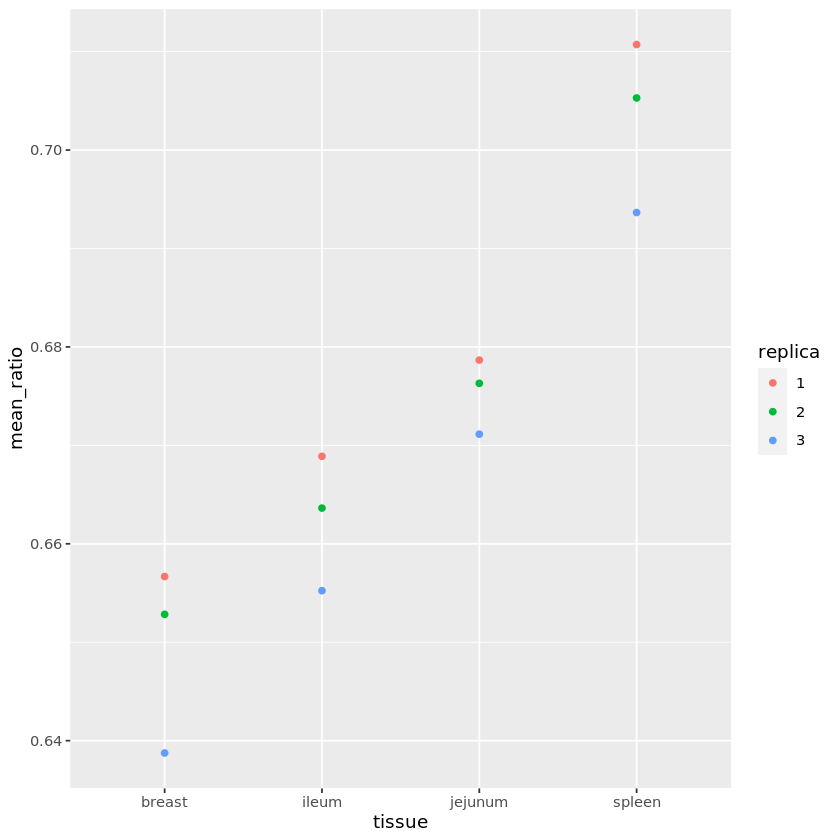

In [54]:
ggplot(mean_ratio, aes(x = tissue, y = mean_ratio, color = replica)) + geom_point()

## data type 2 - CpG reports